#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 5 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score
from scipy import linalg
import matplotlib as mpl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import multivariate_normal

#**Question-1**

##--> Input the dataset


In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-5/iris_data.csv")
dataset.rename({'class': 'species'}, axis=1, inplace=True)
dataset

sepal length  sepal width  petal length  petal width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [3]:
dataset.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##**A.** Preprocess the data and split in training and test set in 70:30 ratio and make sure all classes are present in test data in approximately the same number. Visualize the training data with scatterplot, using all possible combinations of two attributes.

In [5]:
# Since we have to make sure that all classes are present in test data in approximately in same number.

grouped = dataset.groupby(dataset.species)
dataframes = [grouped.get_group("Iris-setosa"), grouped.get_group("Iris-versicolor"), grouped.get_group("Iris-virginica")]
L = []
for i in dataframes:
    target = "species"
    X = i.iloc[:,i.columns != target]
    y = i.iloc[:,i.columns.get_loc(target)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2221)
    L.append([X_train, X_test, y_train, y_test])

x_train = pd.concat([L[0][0], L[1][0], L[2][0]])
x_test = pd.concat([L[0][1], L[1][1], L[2][1]])
y_train = pd.concat([L[0][2], L[1][2], L[2][2]])
y_test = pd.concat([L[0][3], L[1][3], L[2][3]])

In [6]:
x_train

sepal length  sepal width  petal length  petal width
43            5.0          3.5           1.6          0.6
24            4.8          3.4           1.9          0.2
21            5.1          3.7           1.5          0.4
23            5.1          3.3           1.7          0.5
13            4.3          3.0           1.1          0.1
..            ...          ...           ...          ...
130           7.4          2.8           6.1          1.9
140           6.7          3.1           5.6          2.4
106           4.9          2.5           4.5          1.7
120           6.9          3.2           5.7          2.3
132           6.4          2.8           5.6          2.2

[105 rows x 4 columns]

In [7]:
trainingDataset = x_train.copy()
trainingDataset['species'] = y_train

In [8]:
x_train

sepal length  sepal width  petal length  petal width
43            5.0          3.5           1.6          0.6
24            4.8          3.4           1.9          0.2
21            5.1          3.7           1.5          0.4
23            5.1          3.3           1.7          0.5
13            4.3          3.0           1.1          0.1
..            ...          ...           ...          ...
130           7.4          2.8           6.1          1.9
140           6.7          3.1           5.6          2.4
106           4.9          2.5           4.5          1.7
120           6.9          3.2           5.7          2.3
132           6.4          2.8           5.6          2.2

[105 rows x 4 columns]

In [9]:
trainingDataset

sepal length  sepal width  petal length  petal width         species
43            5.0          3.5           1.6          0.6     Iris-setosa
24            4.8          3.4           1.9          0.2     Iris-setosa
21            5.1          3.7           1.5          0.4     Iris-setosa
23            5.1          3.3           1.7          0.5     Iris-setosa
13            4.3          3.0           1.1          0.1     Iris-setosa
..            ...          ...           ...          ...             ...
130           7.4          2.8           6.1          1.9  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
106           4.9          2.5           4.5          1.7  Iris-virginica
120           6.9          3.2           5.7          2.3  Iris-virginica
132           6.4          2.8           5.6          2.2  Iris-virginica

[105 rows x 5 columns]

In [10]:
trainingDataset['species'].value_counts()

Iris-setosa        35
Iris-versicolor    35
Iris-virginica     35
Name: species, dtype: int64


Scatter Plot between the attribute sepal length v/s the attribute sepal width of the training dataset



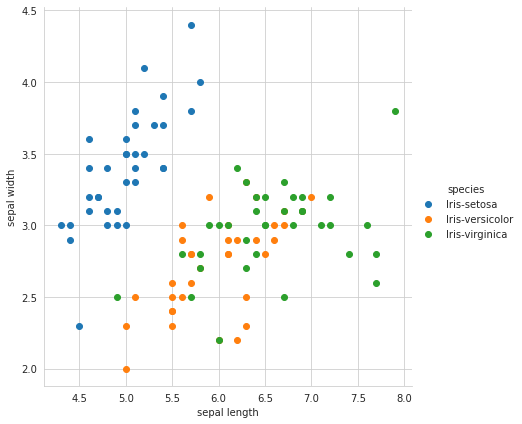


Scatter Plot between the attribute sepal length v/s the attribute petal length of the training dataset



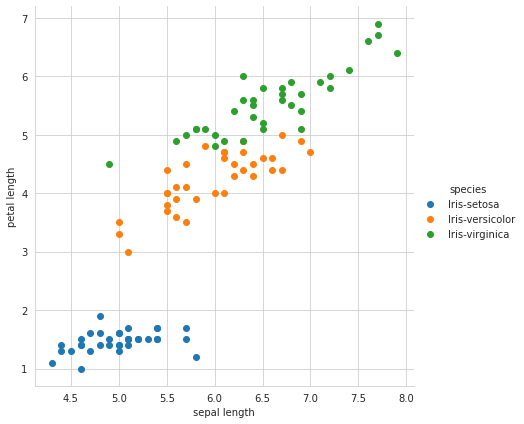


Scatter Plot between the attribute sepal length v/s the attribute petal width of the training dataset



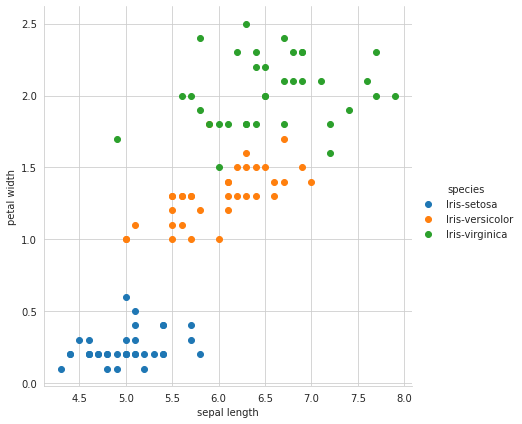


Scatter Plot between the attribute sepal width v/s the attribute sepal length of the training dataset



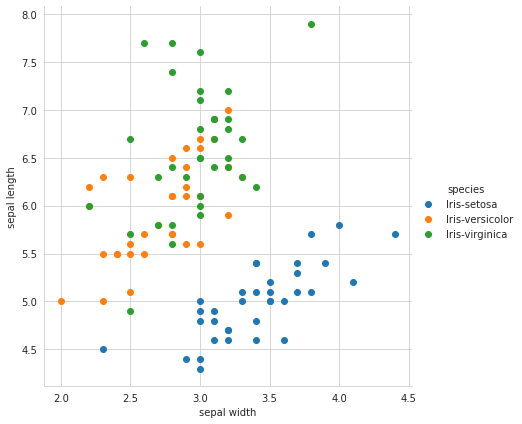


Scatter Plot between the attribute sepal width v/s the attribute petal length of the training dataset



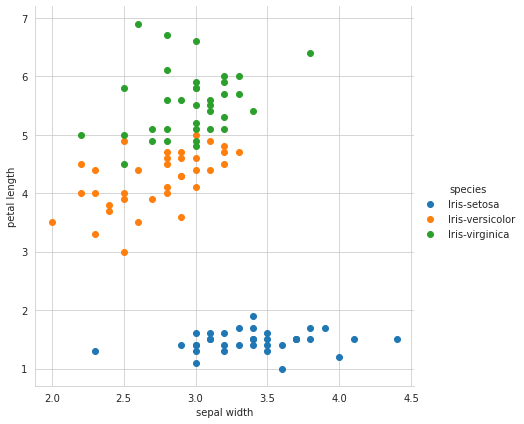


Scatter Plot between the attribute sepal width v/s the attribute petal width of the training dataset



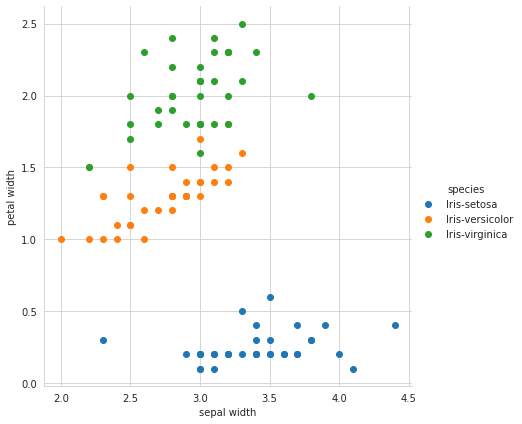


Scatter Plot between the attribute petal length v/s the attribute sepal length of the training dataset



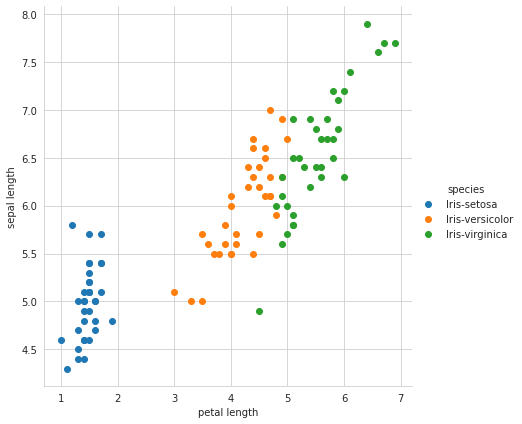


Scatter Plot between the attribute petal length v/s the attribute sepal width of the training dataset



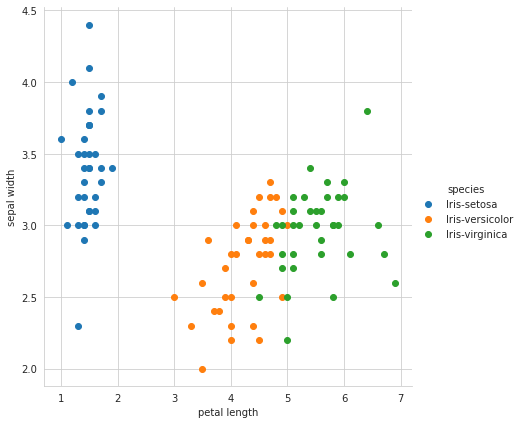


Scatter Plot between the attribute petal length v/s the attribute petal width of the training dataset



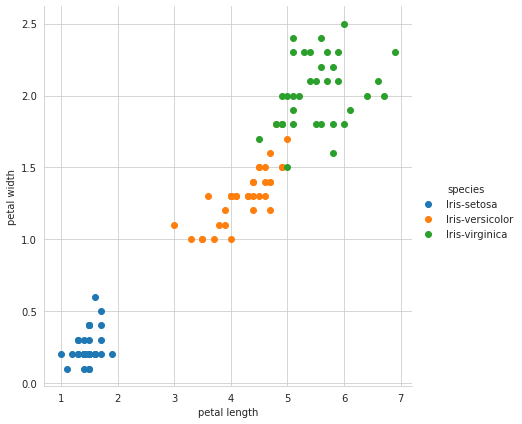


Scatter Plot between the attribute petal width v/s the attribute sepal length of the training dataset



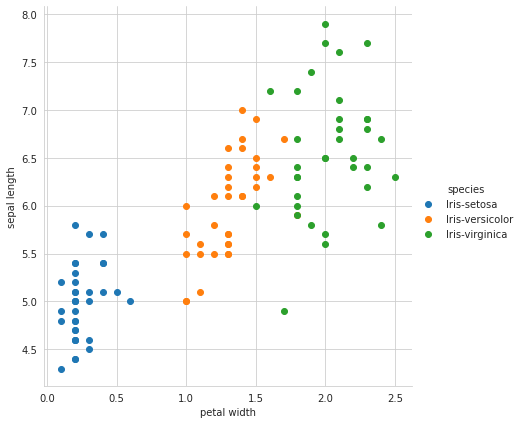


Scatter Plot between the attribute petal width v/s the attribute sepal width of the training dataset



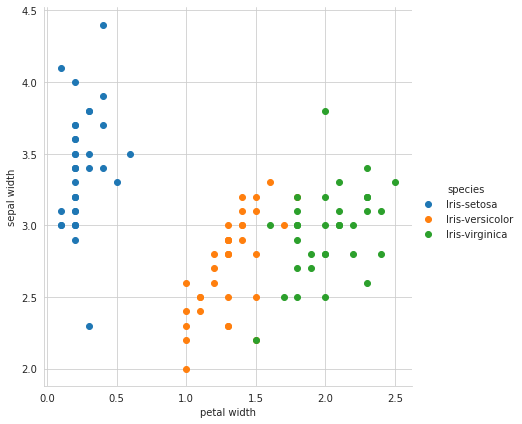


Scatter Plot between the attribute petal width v/s the attribute petal length of the training dataset



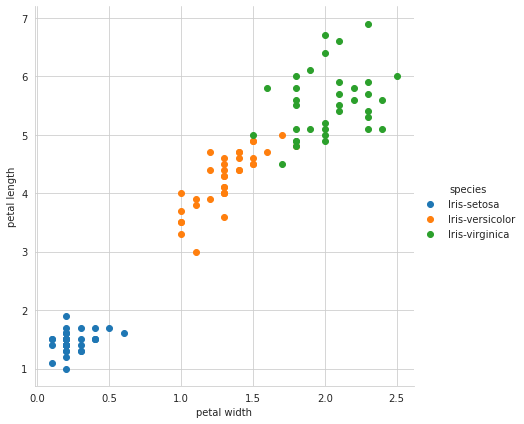

In [11]:
for i in x_train.columns:
    for j in x_train.columns:
        if(i != j):
            print(f"\nScatter Plot between the attribute {i} v/s the attribute {j} of the training dataset\n")
            sns.FacetGrid(trainingDataset, hue ="species", height = 6).map(plt.scatter, i, j).add_legend()
            plt.show()

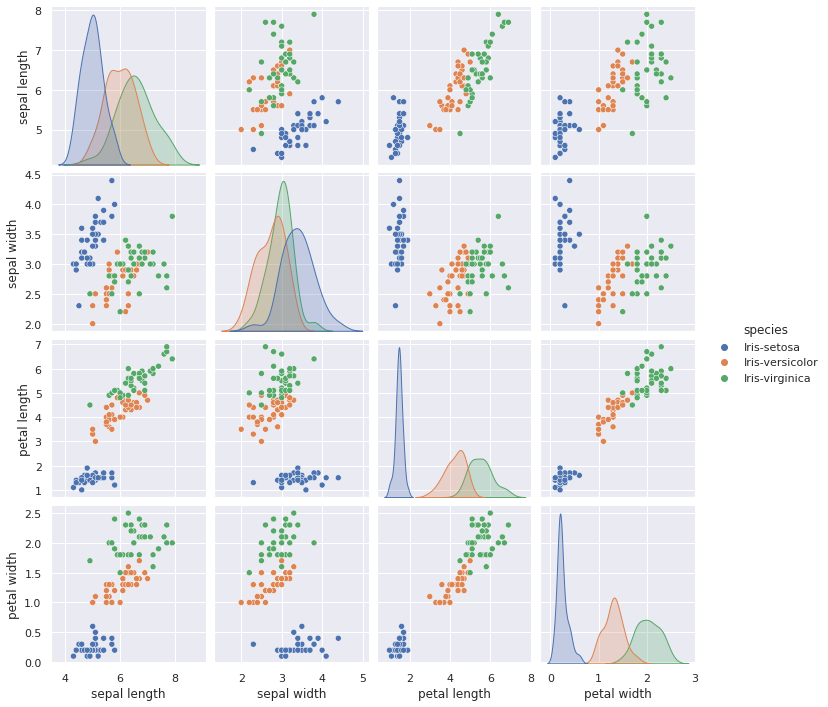

In [12]:
sns.set()
sns.pairplot(trainingDataset, hue='species', height=2.5);

##**B.** Choose any three pairs of features (which you think will give good results), Train QDA models for each pair, for the classification task. You can use the QuadraticDiscriminantAnalysis function from sklearn.

In [13]:
# Three features that I chose are: 
"""
sepal length v/s petal width
sepal width v/s petal width
petal length v/s petal width
"""

'\nsepal length v/s petal width\nsepal width v/s petal width\npetal length v/s petal width\n'

In [14]:
model_1 = QDA(store_covariance=True)
model_1.fit(x_train[["sepal length", "petal width"]], y_train)
_predictions_1 = model_1.predict(x_test[["sepal length", "petal width"]])

In [15]:
model_2 = QDA(store_covariance=True)
model_2.fit(x_train[["sepal width", "petal width"]], y_train)
_predictions_2 = model_2.predict(x_test[["sepal width", "petal width"]])

In [16]:
model_3 = QDA(store_covariance=True)
model_3.fit(x_train[["petal length", "petal width"]], y_train)
_predictions_3 = model_3.predict(x_test[["petal length", "petal width"]])

##**C.** Report the mean and covariance of the distributions found from each QDA model.

In [17]:
print("Mean:")
print(model_1.means_)
print("Covariance:")
print(model_1.covariance_)

Mean:
[[4.98857143 0.24571429]
 [5.99142857 1.30857143]
 [6.56571429 2.02857143]]
Covariance:
[array([[0.14398319, 0.01289076],
       [0.01289076, 0.01255462]]), array([[0.27433613, 0.06742857],
       [0.06742857, 0.03963025]]), array([[0.4434958 , 0.03218487],
       [0.03218487, 0.06033613]])]


In [18]:
print("Mean:")
print(model_2.means_)
print("Covariance:")
print(model_2.covariance_)

Mean:
[[3.4        0.24571429]
 [2.73142857 1.30857143]
 [2.96571429 2.02857143]]
Covariance:
[array([[0.16117647, 0.01147059],
       [0.01147059, 0.01255462]]), array([[0.11280672, 0.04442857],
       [0.04442857, 0.03963025]]), array([[0.09173109, 0.03159664],
       [0.03159664, 0.06033613]])]


In [19]:
print("Mean:")
print(model_3.means_)
print("Covariance:")
print(model_3.covariance_)

Mean:
[[1.46571429 0.24571429]
 [4.23714286 1.30857143]
 [5.54       2.02857143]]
Covariance:
[array([[0.03114286, 0.00631933],
       [0.00631933, 0.01255462]]), array([[0.24181513, 0.07820168],
       [0.07820168, 0.03963025]]), array([[0.32188235, 0.04147059],
       [0.04147059, 0.06033613]])]


##**D.** Plot the decision boundary given by the QDA models on top of the corresponding scatterplot visualization of the data.

In [20]:
xx, yy = np.meshgrid(np.linspace(2, 8, 200), np.linspace(0,3, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_qda = model_1.predict_proba(X_grid)[:,1].reshape(xx.shape)
print(xx.shape,yy.shape,X_grid.shape,probabilities_qda.shape)

(200, 200) (200, 200) (40000, 2) (200, 200)


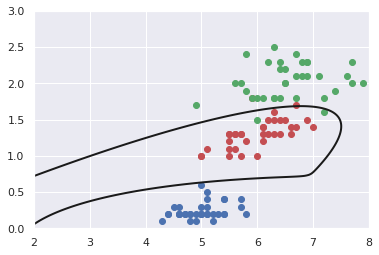

In [21]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train=="Iris-setosa"][["sepal length"]], x_train[y_train=="Iris-setosa"][["petal width"]], c='b', label='0')
splot.scatter(x_train[y_train=="Iris-versicolor"][["sepal length"]], x_train[y_train=="Iris-versicolor"][["petal width"]], c='r', label='0')
splot.scatter(x_train[y_train=="Iris-virginica"][["sepal length"]], x_train[y_train=="Iris-virginica"][["petal width"]], c='g', label='0')

plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
plt.show()

In [22]:
xx, yy = np.meshgrid(np.linspace(1.5, 6, 200), np.linspace(-0.5, 3, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_qda = model_2.predict_proba(X_grid)[:,1].reshape(xx.shape)
print(xx.shape,yy.shape,X_grid.shape,probabilities_qda.shape)

(200, 200) (200, 200) (40000, 2) (200, 200)


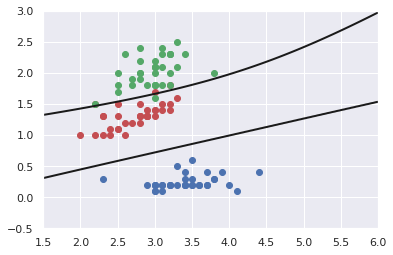

In [23]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train=="Iris-setosa"][["sepal width"]], x_train[y_train=="Iris-setosa"][["petal width"]], c='b', label='0')
splot.scatter(x_train[y_train=="Iris-versicolor"][["sepal width"]], x_train[y_train=="Iris-versicolor"][["petal width"]], c='r', label='0')
splot.scatter(x_train[y_train=="Iris-virginica"][["sepal width"]], x_train[y_train=="Iris-virginica"][["petal width"]], c='g', label='0')

plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
plt.show()

In [24]:
xx, yy = np.meshgrid(np.linspace(0.5, 8, 200), np.linspace(-0.5, 3, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_qda = model_3.predict_proba(X_grid)[:,1].reshape(xx.shape)
print(xx.shape,yy.shape,X_grid.shape,probabilities_qda.shape)

(200, 200) (200, 200) (40000, 2) (200, 200)


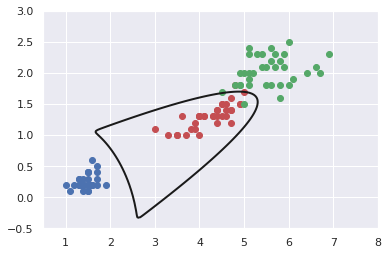

In [25]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train=="Iris-setosa"][["petal length"]], x_train[y_train=="Iris-setosa"][["petal width"]], c='b', label='0')
splot.scatter(x_train[y_train=="Iris-versicolor"][["petal length"]], x_train[y_train=="Iris-versicolor"][["petal width"]], c='r', label='0')
splot.scatter(x_train[y_train=="Iris-virginica"][["petal length"]], x_train[y_train=="Iris-virginica"][["petal width"]], c='g', label='0')

plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
plt.show()

##**E.** Predict the test data and report error rate for each case. Which pair of features do you think gives the best result and why?

In [26]:
model = QDA()
for i in x_train.columns:
    for j in x_train.columns:
        if(i!=j):
            model.fit(x_train[[i,j]], y_train)
            _predictions = model.predict(x_test[[i,j]])
            acc = accuracy_score(y_test, _predictions)*100
            print(f"For features {i} v/s {j} the accuracy came out to be: {acc}%")

For features sepal length v/s sepal width the accuracy came out to be: 75.55555555555556%
For features sepal length v/s petal length the accuracy came out to be: 91.11111111111111%
For features sepal length v/s petal width the accuracy came out to be: 95.55555555555556%
For features sepal width v/s sepal length the accuracy came out to be: 75.55555555555556%
For features sepal width v/s petal length the accuracy came out to be: 95.55555555555556%
For features sepal width v/s petal width the accuracy came out to be: 93.33333333333333%
For features petal length v/s sepal length the accuracy came out to be: 91.11111111111111%
For features petal length v/s sepal width the accuracy came out to be: 95.55555555555556%
For features petal length v/s petal width the accuracy came out to be: 97.77777777777777%
For features petal width v/s sepal length the accuracy came out to be: 95.55555555555556%
For features petal width v/s sepal width the accuracy came out to be: 93.33333333333333%
For featur

In [27]:
model1acc = accuracy_score(y_test, _predictions_1)*100
model1acc

95.55555555555556

In [28]:
model2acc = accuracy_score(y_test, _predictions_2)*100
model2acc

93.33333333333333

In [29]:
model3acc = accuracy_score(y_test, _predictions_3)*100
model3acc

97.77777777777777

##**F.** Take the pair of features that has given the best result and train LDA model with same training data. You can use the LinearDiscriminantAnalysis function from sklearn.

In [30]:
modelLDA = LDA(store_covariance=True)
modelLDA.fit(x_train[["petal length", "petal width"]], y_train)

LinearDiscriminantAnalysis(store_covariance=True)

##**G.** Plot the decision boundary given by the LDA model on top of the scatterplot visualizationof the data.

In [31]:
xx, yy = np.meshgrid(np.linspace(0.75, 8, 200), np.linspace(0, 2.75, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_qda = modelLDA.predict_proba(X_grid)[:,1].reshape(xx.shape)

print(xx.shape,yy.shape,X_grid.shape,probabilities_qda.shape)

(200, 200) (200, 200) (40000, 2) (200, 200)


In [32]:
modelLDA.covariance_

array([[0.19261497, 0.04079728],
       [0.04079728, 0.03643537]])

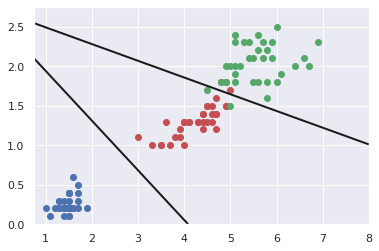

In [33]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)

splot.scatter(x_train[y_train=="Iris-setosa"][["petal length"]], x_train[y_train=="Iris-setosa"][["petal width"]], c='b', label='0')
splot.scatter(x_train[y_train=="Iris-versicolor"][["petal length"]], x_train[y_train=="Iris-versicolor"][["petal width"]], c='r', label='0')
splot.scatter(x_train[y_train=="Iris-virginica"][["petal length"]], x_train[y_train=="Iris-virginica"][["petal width"]], c='g', label='0')


plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
plt.show()

##**H.** Report the error rate on the test data for LDA model. Which one between LDA and QDA has performed better do you think? Justify your answer.

In [34]:
predictions = modelLDA.predict(x_test[["petal length", "petal width"]])

In [35]:
print(f"{accuracy_score(y_test, predictions)*100}%")

95.55555555555556%


##**I.** Visualize the gaussian distributions obtained from QDA and LDA. (you can draw ellipse as shown in demo or you can use any other function to visualize.)

In [37]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1]/u[0])
    angle = 180 * angle / np.pi
    ell = mpl.patches.Ellipse(mean, 4 * v[0] ** 0.5, 4 * v[1] ** 0.5, 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.plot(mean[0], mean[1], "*", color="yellow", markersize=15)

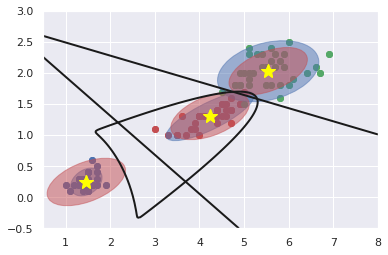

In [38]:
splot = plt.figure()
splot = plt.subplot(1, 1, 1)
xx, yy = np.meshgrid(np.linspace(0.5, 8, 200), np.linspace(-0.5, 3, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
probabilities_qda = model_3.predict_proba(X_grid)[:,1].reshape(xx.shape)

splot.scatter(x_train[y_train=="Iris-setosa"][["petal length"]], x_train[y_train=="Iris-setosa"][["petal width"]], c='b', label='0')
splot.scatter(x_train[y_train=="Iris-versicolor"][["petal length"]], x_train[y_train=="Iris-versicolor"][["petal width"]], c='r', label='0')
splot.scatter(x_train[y_train=="Iris-virginica"][["petal length"]], x_train[y_train=="Iris-virginica"][["petal width"]], c='g', label='0')

plot_ellipse(splot, model_3.means_[0], model_3.covariance_[0], 'b')
plot_ellipse(splot, model_3.means_[1], model_3.covariance_[1], 'b')
plot_ellipse(splot, model_3.means_[2], model_3.covariance_[2], 'b')
plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')

probabilities_qda = modelLDA.predict_proba(X_grid)[:,1].reshape(xx.shape)
splot.scatter(x_train[y_train=="Iris-setosa"][["petal length"]], x_train[y_train=="Iris-setosa"][["petal width"]], c='b', label='0')
splot.scatter(x_train[y_train=="Iris-versicolor"][["petal length"]], x_train[y_train=="Iris-versicolor"][["petal width"]], c='r', label='0')
splot.scatter(x_train[y_train=="Iris-virginica"][["petal length"]], x_train[y_train=="Iris-virginica"][["petal width"]], c='g', label='0')

plot_ellipse(splot, modelLDA.means_[0], modelLDA.covariance_, 'r')
plot_ellipse(splot, modelLDA.means_[1], modelLDA.covariance_, 'r')
plot_ellipse(splot, modelLDA.means_[2], modelLDA.covariance_, 'r')
plt.contour(xx, yy, probabilities_qda, [0.5], linewidths=2., colors='k')
plt.show()

#**Question 2**

##--> Input the dataset

In [39]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-5/iris_data.csv")
dataset.rename({'class': 'species'}, axis=1, inplace=True)
dataset.drop(['sepal length', 'sepal width'], axis = 1, inplace = True)
dataset

petal length  petal width         species
0             1.4          0.2     Iris-setosa
1             1.4          0.2     Iris-setosa
2             1.3          0.2     Iris-setosa
3             1.5          0.2     Iris-setosa
4             1.4          0.2     Iris-setosa
..            ...          ...             ...
145           5.2          2.3  Iris-virginica
146           5.0          1.9  Iris-virginica
147           5.2          2.0  Iris-virginica
148           5.4          2.3  Iris-virginica
149           5.1          1.8  Iris-virginica

[150 rows x 3 columns]

In [40]:
dataset.isnull().sum()

petal length    0
petal width     0
species         0
dtype: int64

In [41]:
grouped = dataset.groupby(dataset.species)
dataframes = [grouped.get_group("Iris-setosa"), grouped.get_group("Iris-versicolor"), grouped.get_group("Iris-virginica")]
L = []
for i in dataframes:
    target = "species"
    X = i.iloc[:,i.columns != target]
    y = i.iloc[:,i.columns.get_loc(target)]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2221)
    L.append([X_train, X_test, y_train, y_test])

x_train = pd.concat([L[0][0], L[1][0], L[2][0]])
x_test = pd.concat([L[0][1], L[1][1], L[2][1]])
y_train = pd.concat([L[0][2], L[1][2], L[2][2]])
y_test = pd.concat([L[0][3], L[1][3], L[2][3]])

##**a)** From the data, find out the sample mean and sample covariance matrix of each class and visualize the gaussian distribution using the obtained sample mean and sample covariance matrix.

In [42]:
trainingDataset = x_train.copy()
trainingDataset['species'] = y_train

In [43]:
grouped = trainingDataset.groupby(trainingDataset.species)
dataframes = [grouped.get_group("Iris-setosa"), grouped.get_group("Iris-versicolor"), grouped.get_group("Iris-virginica")]

In [44]:
sampleMean = []
sampleCov = []
for i in range(3):
    df = pd.DataFrame(dataframes[i], columns=['petal length', 'petal width'])
    sampleMean.append(df.mean().values)
    sampleCov.append(df.cov().values)

In [45]:
sampleMean

[array([1.46571429, 0.24571429]),
 array([4.23714286, 1.30857143]),
 array([5.54      , 2.02857143])]

In [46]:
sampleCov

[array([[0.03114286, 0.00631933],
        [0.00631933, 0.01255462]]), array([[0.24181513, 0.07820168],
        [0.07820168, 0.03963025]]), array([[0.32188235, 0.04147059],
        [0.04147059, 0.06033613]])]

In [47]:
sampleMeanParta = sampleMean
sampleCovParta = sampleCov

###Multivariate Gaussian Distribuition for class1 obtained using sampleMean[0] and sampleCov[0]

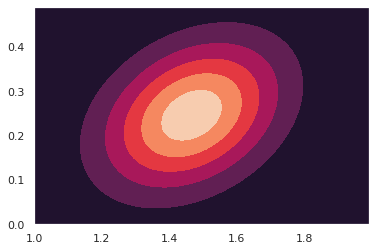

In [48]:
x, y = np.mgrid[1:2:0.01, 0:0.5:0.01]
pos = np.dstack((x, y))
rv = multivariate_normal(sampleMean[0], sampleCov[0])
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.contourf(x, y, rv.pdf(pos))

###Multivariate Gaussian Distribuition for class2 obtained using sampleMean[1] and sampleCov[1]

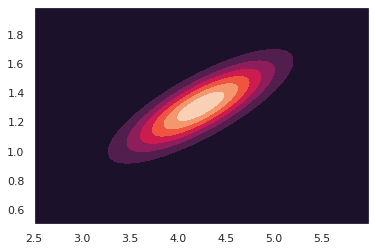

In [49]:
x, y = np.mgrid[2.5:6:0.01, 0.5:2:0.01]
pos = np.dstack((x, y))
rv = multivariate_normal(sampleMean[1], sampleCov[1])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

###Multivariate Gaussian Distribuition for class3 obtained using sampleMean[2] and sampleCov[2]

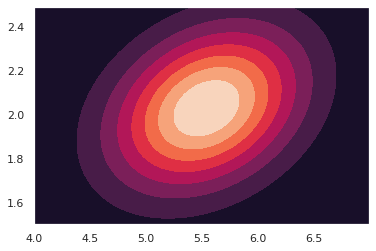

In [50]:
x, y = np.mgrid[4:7:0.01, 1.5:2.5:0.01]
pos = np.dstack((x, y))
rv = multivariate_normal(sampleMean[2], sampleCov[2])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos))

###Gaussian Distribution Plots


 Gaussian Distribution plot for feature petal length



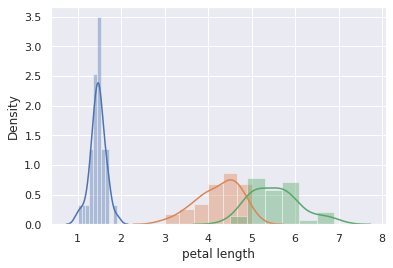


 Gaussian Distribution plot for feature petal width



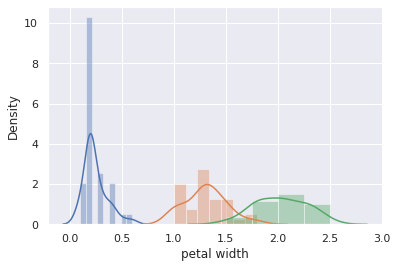

In [51]:
for i in range(3):
    sns.distplot(dataframes[i]['petal length'])
print(f"\n Gaussian Distribution plot for feature petal length\n")
plt.show()

for i in range(3):
    sns.distplot(dataframes[i]['petal width'])
print(f"\n Gaussian Distribution plot for feature petal width\n")
plt.show()

##**b)** Write a function compute_likelihood to compute the likelihood of data given the parameters mean and covariance matrix assuming gaussian distribution.

In [52]:
def compute_likelihood(x, mu, cov):
    a = (x-mu).T
    b = np.linalg.inv(cov)
    c = x-mu
    store1 = np.matmul(a,b)
    store2 = np.matmul(store1,c)
    ans = (-1/2)*(store2) - np.log(2*np.pi) - (1/2)*abs(np.log(np.linalg.det(cov)))
    return float(np.exp(ans))

In [53]:
for i in range(len(x_test)):
    x = np.array([[x_test['petal length'].tolist()[i]],[x_test['petal width'].tolist()[i]]])
    print(compute_likelihood(x, np.array([[sampleMean[0][0]],[sampleMean[0][1]]]), sampleCov[0]), compute_likelihood(x, np.array([[sampleMean[1][0]],[sampleMean[1][1]]]), sampleCov[1]), compute_likelihood(x, np.array([[sampleMean[2][0]],[sampleMean[2][1]]]), sampleCov[2]))

0.00011888156538726246 5.169993451749007e-08 1.1961831371001786e-16
0.002655821307226662 1.5518763231780839e-10 1.3783116120068306e-20
0.002655821307226662 1.5518763231780839e-10 1.3783116120068306e-20
0.0010911508707236797 4.783231094704065e-09 7.794277492354899e-18
0.002587421897935734 3.079397678419881e-10 3.6203319511697723e-20
0.0019064031200717833 6.976143701743783e-11 5.071579348233327e-21
0.0022715024079479405 4.1499422656858997e-10 1.3264755003618806e-19
0.0019064031200717833 6.976143701743783e-11 5.071579348233327e-21
0.0017628685731954012 5.450563837971972e-10 9.190648553265426e-20
0.001040640666765119 4.5760530467786406e-11 3.063722932060769e-21
0.00040069477740716143 1.5821788312521643e-10 3.737017588268233e-19
0.0017628685731954012 5.450563837971972e-10 9.190648553265426e-20
0.001040640666765119 4.5760530467786406e-11 3.063722932060769e-21
0.0009570065652822115 2.7973107261670837e-11 1.8035817088599425e-21
0.0022715024079479405 4.1499422656858997e-10 1.3264755003618806e-1

##**c)** Write a function to perform maximum likelihood estimation over the training dataset to determine mean and covariance and classify it using Bayes classifier. Report the parameters obtained for each class.

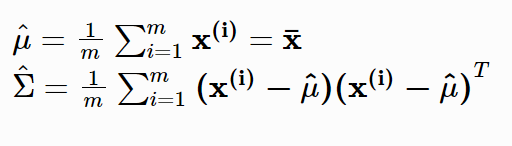

In [54]:
def MLE(dataset):
    grouped = dataset.groupby(dataset.species)
    dataframes = [grouped.get_group("Iris-setosa"), grouped.get_group("Iris-versicolor"), grouped.get_group("Iris-virginica")]
    meanMLE = []
    covMLE = []
    _meanMLE = []
    for i in range(len(dataframes)):
        x = []
        mean = [0,0]
        cov = [[0,0],
               [0,0]]
        for j in range(len(dataframes[i])):
            x.append(np.array([[dataframes[i]['petal length'].tolist()[j]],[dataframes[i]['petal width'].tolist()[j]]]))
        for k in range(len(dataframes[i])):
            mean[0] += x[k][0]
            mean[1] += x[k][1]
        mean[0] = mean[0]/len(dataframes[i])
        mean[1] = mean[1]/len(dataframes[i]) 
        meanMLE.append(mean) 
        _meanMLE.append([meanMLE[i][0][0],meanMLE[i][1][0]]) 
        for k in range(len(dataframes[i])):
            cov = cov + (x[k]-meanMLE[-1]).dot((x[k]-meanMLE[-1]).T)
        cov[0][0] = cov[0][0]/len(dataframes[i])
        cov[0][1] = cov[0][1]/len(dataframes[i])
        cov[1][0] = cov[1][0]/len(dataframes[i])
        cov[1][1] = cov[1][1]/len(dataframes[i])
        covMLE.append(cov)
    return _meanMLE, covMLE

In [55]:
mean, cov = MLE(trainingDataset)

In [56]:
mean

[[1.4657142857142855, 0.2457142857142858],
 [4.2371428571428575, 1.3085714285714287],
 [5.54, 2.0285714285714285]]

In [57]:
cov

[array([[0.03025306, 0.00613878],
        [0.00613878, 0.01219592]]), array([[0.23490612, 0.07596735],
        [0.07596735, 0.03849796]]), array([[0.31268571, 0.04028571],
        [0.04028571, 0.05861224]])]

In [58]:
sampleMeanPartb = mean
sampleCovPartb = cov

###Bayes Classifier

In [59]:
def bayes_classify(trainingDataset, testingDataset):
    grouped = trainingDataset.groupby(trainingDataset.species)
    dataframes = [grouped.get_group("Iris-setosa"), grouped.get_group("Iris-versicolor"), grouped.get_group("Iris-virginica")]
    sampleMean = []
    sampleCov = []
    for i in range(3):
        df = pd.DataFrame(dataframes[i], columns=['petal length', 'petal width'])
        sampleMean.append(df.mean().values)
        sampleCov.append(df.cov().values)
    priorClass1 = len(trainingDataset[trainingDataset['species']=='Iris-setosa'])/len(trainingDataset)
    priorClass2 = len(trainingDataset[trainingDataset['species']=='Iris-versicolor'])/len(trainingDataset)
    priorClass3 = len(trainingDataset[trainingDataset['species']=='Iris-virginica'])/len(trainingDataset)
    likelihoodClass1 = []
    likelihoodClass2 = []
    likelihoodClass3 = []
    for i in range(len(testingDataset)):
        x = np.array([[testingDataset['petal length'].tolist()[i]],[testingDataset['petal width'].tolist()[i]]])
        likelihoodClass1.append(compute_likelihood(x, np.array([[sampleMean[0][0]],[sampleMean[0][1]]]), sampleCov[0]))
        likelihoodClass2.append(compute_likelihood(x, np.array([[sampleMean[1][0]],[sampleMean[1][1]]]), sampleCov[1]))   
        likelihoodClass3.append(compute_likelihood(x, np.array([[sampleMean[2][0]],[sampleMean[2][1]]]), sampleCov[2]))    
    evidence = []
    for i in range(len(testingDataset)):
        evidence.append(likelihoodClass1[i] + likelihoodClass2[i] + likelihoodClass3[i])
    posteriorProbabilityClass1 = []
    posteriorProbabilityClass2 = []
    posteriorProbabilityClass3 = []
    for i in range(len(testingDataset)):
        posteriorProbabilityClass1.append((likelihoodClass1[i]*priorClass1)/(evidence[i]))
        posteriorProbabilityClass2.append((likelihoodClass2[i]*priorClass2)/(evidence[i]))
        posteriorProbabilityClass3.append((likelihoodClass3[i]*priorClass3)/(evidence[i]))
    y_pred = []
    class1 = "Iris-setosa"
    class2 = "Iris-versicolor"
    class3 = "Iris-virginica"
    for i in range(len(testingDataset)):
        if(posteriorProbabilityClass1[i] > posteriorProbabilityClass2[i]):
            if(posteriorProbabilityClass1[i] > posteriorProbabilityClass3[i]):
                y_pred.append(class1)
            else:
                y_pred.append(class3)
        else:
            if(posteriorProbabilityClass2[i] > posteriorProbabilityClass3[i]):
                 y_pred.append(class2)
            else:
                y_pred.append(class3)
    return y_pred

In [60]:
predictions = bayes_classify(trainingDataset, trainingDataset)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(trainingDataset['species'].tolist(), predictions)*100

97.14285714285714

##**d)** Visualize the gaussian distribution from mean and covariance of both the above parts (a and c) in a single plot.

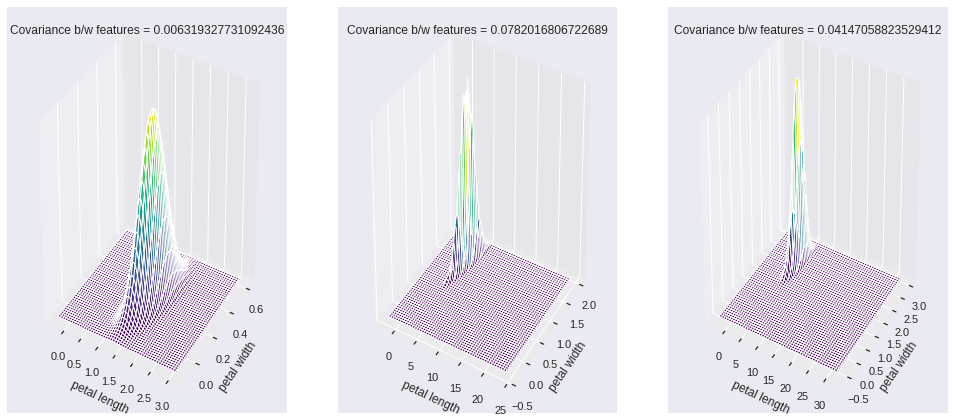

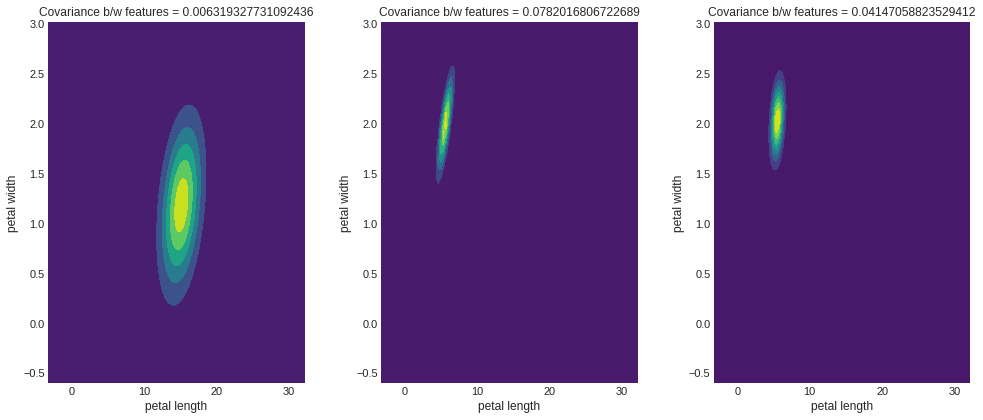

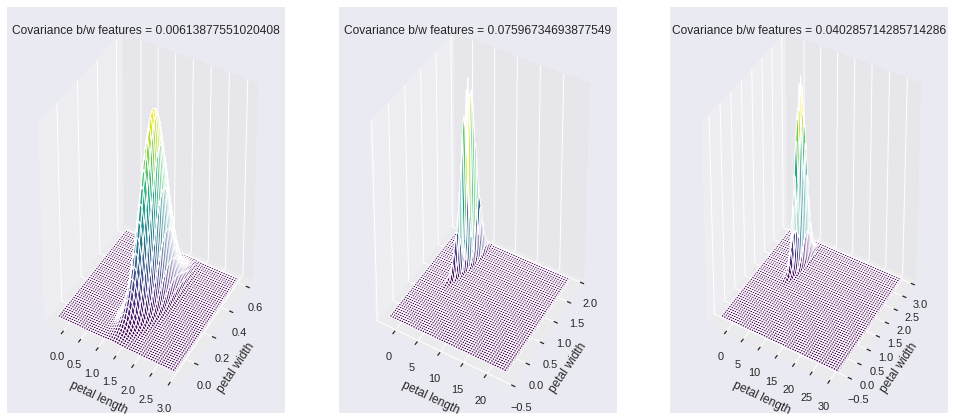

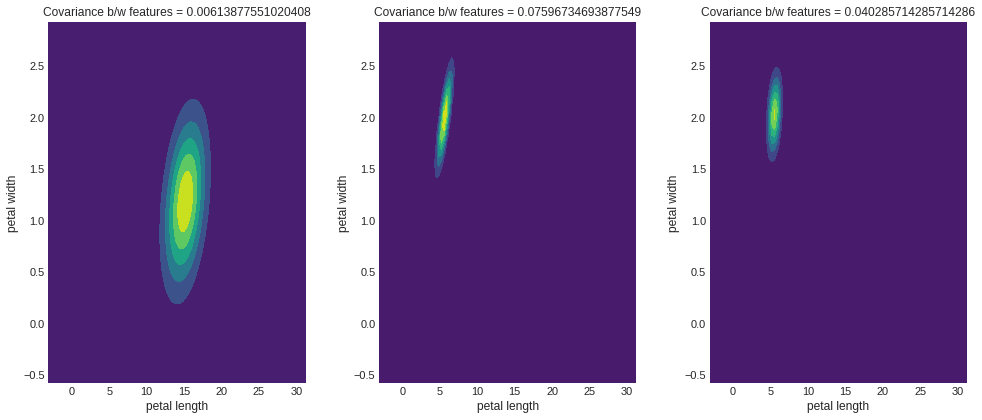

In [63]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
random_seed=1000

pdf_list = []
for idx in range(3):
	cov = sampleCovParta[idx]	
	mean = sampleMeanParta[idx]
	distr = multivariate_normal(cov = cov, mean = mean, seed = random_seed)
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]
	x = np.linspace(-10*sigma_1, 100*sigma_1, num=100)
	y = np.linspace(-10*sigma_2, 50*sigma_2, num=100)
	X, Y = np.meshgrid(x,y)
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("petal length")
	plt.ylabel("petal width")
	plt.title(f'Covariance b/w features = {sampleCovParta[idx][0][1]}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("petal length")
	plt.ylabel("petal width")
	plt.title(f'Covariance b/w features = {sampleCovParta[idx][0][1]}')
plt.tight_layout()
plt.show()

print(" ")
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()
random_seed=1000

pdf_list = []
for idx in range(3):
	cov = sampleCovPartb[idx]	
	mean = sampleMeanPartb[idx]
	distr = multivariate_normal(cov = cov, mean = mean, seed = random_seed)
	mean_1, mean_2 = mean[0], mean[1]
	sigma_1, sigma_2 = cov[0,0], cov[1,1]
	x = np.linspace(-10*sigma_1, 100*sigma_1, num=100)
	y = np.linspace(-10*sigma_2, 50*sigma_2, num=100)
	X, Y = np.meshgrid(x,y)
	pdf = np.zeros(X.shape)
	for i in range(X.shape[0]):
		for j in range(X.shape[1]):
			pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])
	key = 131+idx
	ax = fig.add_subplot(key, projection = '3d')
	ax.plot_surface(X, Y, pdf, cmap = 'viridis')
	plt.xlabel("petal length")
	plt.ylabel("petal width")
	plt.title(f'Covariance b/w features = {sampleCovPartb[idx][0][1]}')
	pdf_list.append(pdf)
	ax.axes.zaxis.set_ticks([])

plt.tight_layout()
plt.show()
for idx, val in enumerate(pdf_list):
	plt.subplot(1,3,idx+1)
	plt.contourf(X, Y, val, cmap='viridis')
	plt.xlabel("petal length")
	plt.ylabel("petal width")
	plt.title(f'Covariance b/w features = {sampleCovPartb[idx][0][1]}')
plt.tight_layout()
plt.show()

##**e)** Predict the test data and compare the performance obtained in question1(with QDA)

In [64]:
predictions = bayes_classify(trainingDataset, x_test)

In [65]:
from sklearn.metrics import accuracy_score
print(f"{accuracy_score(y_test, predictions)*100}%")

97.77777777777777%


#**Question-3**

##--> Input the dataset

In [66]:
# import pandas as pd
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-5/data/train.data', sep=" ", header=None, names=["docId", "termId", "Count"])
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-5/data/test.data', sep=" ", header=None, names=["docId", "termId", "Count"])
train_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-5/data/train.label', sep=" ", header=None, names=["label"])
test_label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-5/data/test.label', sep=" ", header=None, names=["label"])

In [67]:
print("-----> train_data\n")
print(train_data)
print("\n-----> test_data\n")
print(test_data)
print("\n-----> train_label\n")
print(train_label)
print("\n-----> test_label\n")
print(test_label)

-----> train_data

         docId  termId  Count
0            1       1      4
1            1       2      2
2            1       3     10
3            1       4      4
4            1       5      2
...        ...     ...    ...
1467340  11269   47387      1
1467341  11269   48339      1
1467342  11269   48919      1
1467343  11269   51544      1
1467344  11269   53958      1

[1467345 rows x 3 columns]

-----> test_data

        docId  termId  Count
0           1       3      1
1           1      10      1
2           1      12      8
3           1      17      1
4           1      23      8
...       ...     ...    ...
967869   7505   44515      1
967870   7505   47720      1
967871   7505   50324      1
967872   7505   59935      1
967873   7505   61188      2

[967874 rows x 3 columns]

-----> train_label

       label
0          1
1          1
2          1
3          1
4          1
...      ...
11264     20
11265     20
11266     20
11267     20
11268     20

[11269 rows x 1 colum

In [68]:
def datasetCovertor(dataset, dataset_label):
    grouped = dataset.groupby(dataset.docId)
    dataframes = []
    for i in range(len(dataset_label)):
        dataframes.append(grouped.get_group(i+1))
    for i in range(len(dataframes)):
        _value = dataset_label['label'][i]
        dataframes[i]['label'] = _value
    final = pd.concat(dataframes)
    return final

In [69]:
trainingDataset = datasetCovertor(train_data, train_label)

In [70]:
trainingDataset

docId  termId  Count  label
0            1       1      4      1
1            1       2      2      1
2            1       3     10      1
3            1       4      4      1
4            1       5      2      1
...        ...     ...    ...    ...
1467340  11269   47387      1     20
1467341  11269   48339      1     20
1467342  11269   48919      1     20
1467343  11269   51544      1     20
1467344  11269   53958      1     20

[1467345 rows x 4 columns]


 Distribution plot for feature docId



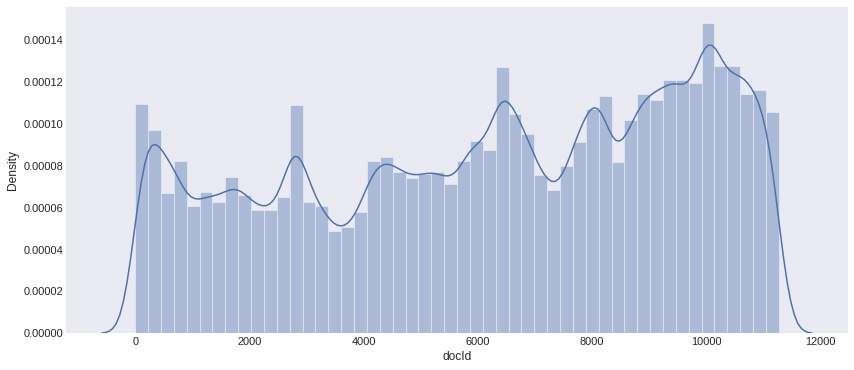


 Distribution plot for feature termId



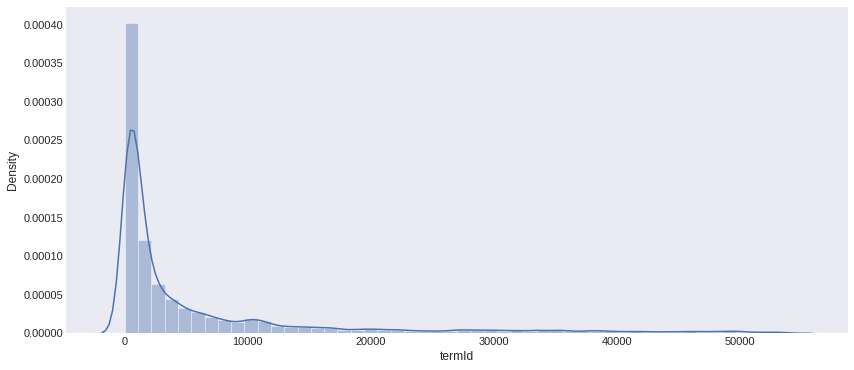


 Distribution plot for feature Count



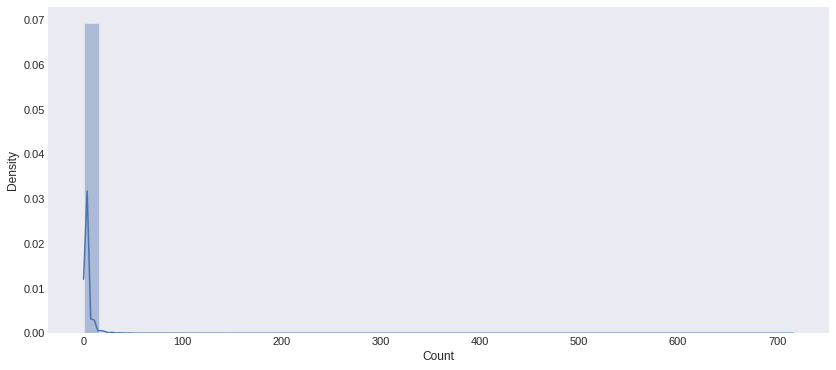

In [71]:
sns.distplot(trainingDataset['docId'])
print(f"\n Distribution plot for feature docId\n")
plt.show()

sns.distplot(trainingDataset['termId'])
print(f"\n Distribution plot for feature termId\n")
plt.show()

sns.distplot(trainingDataset['Count'])
print(f"\n Distribution plot for feature Count\n")
plt.show()

##**1.** Compute the likelihood of the training data-set( without using any standard library).

In [72]:
def likelihood(dataset):
    grouped = dataset.groupby(dataset.label)
    dataframes = []
    for i in range(1,21):
        dataframes.append(grouped.get_group(i))
    Likelihood = []
    masterDictList = []
    totalCount = []
    uniqueTermId = list(set(dataset['termId'].tolist()))
    for i in range(len(dataframes)):
        Dict = {}
        Dict2 = {}
        _termId = dataframes[i]['termId'].tolist()
        _Count = dataframes[i]['Count'].tolist()
        _sum = sum(_Count)
        totalCount.append(_sum)
        for j in uniqueTermId:
            Dict[j] = 0
            Dict2[j] = 0
        for j in range(len(_termId)):
            Dict[_termId[j]] +=  _Count[j]
            Dict2[_termId[j]] += _Count[j]/_sum
        masterDictList.append(Dict)
        Likelihood.append(Dict2)
    return Likelihood, masterDictList, totalCount

In [73]:
likelihoodList, dictList, totalCount = likelihood(trainingDataset)

In [74]:
likelihoodList

[{1: 8.735854635378868e-05,
  2: 0.0004233529554068219,
  3: 0.0018479692497916842,
  4: 6.0478993629546005e-05,
  5: 0.0005510308308469748,
  6: 0.0002755154154234872,
  7: 4.0319329086364006e-05,
  8: 6.719888181060667e-06,
  9: 0.00022847619815606263,
  10: 0.000940784345348494,
  11: 2.0159664543182e-05,
  12: 0.027430583555089646,
  13: 0.00010751821089697067,
  14: 0.00012095798725909201,
  15: 0.00027551541542348727,
  16: 0.003749697605031844,
  17: 0.001485095288014409,
  18: 6.719888181060667e-05,
  19: 4.7039217267424675e-05,
  20: 7.391876999166734e-05,
  21: 6.719888181060667e-06,
  22: 6.719888181060667e-06,
  23: 0.01832513506975241,
  24: 2.0159664543182003e-05,
  25: 0.002042846007042445,
  26: 6.719888181060667e-06,
  27: 0.00867537564174929,
  28: 0.00010751821089697069,
  29: 0.04813455904093755,
  30: 0.018056339542509965,
  31: 0.0013439776362121343,
  32: 0.00015455742816439531,
  33: 0.028042093379566185,
  34: 6.719888181060667e-06,
  35: 8.063865817272801e-05,

In [75]:
dictList

[{1: 13,
  2: 63,
  3: 275,
  4: 9,
  5: 82,
  6: 41,
  7: 6,
  8: 1,
  9: 34,
  10: 140,
  11: 3,
  12: 4082,
  13: 16,
  14: 18,
  15: 41,
  16: 558,
  17: 221,
  18: 10,
  19: 7,
  20: 11,
  21: 1,
  22: 1,
  23: 2727,
  24: 3,
  25: 304,
  26: 1,
  27: 1291,
  28: 16,
  29: 7163,
  30: 2687,
  31: 200,
  32: 23,
  33: 4173,
  34: 1,
  35: 12,
  36: 2,
  37: 3,
  38: 4,
  39: 29,
  40: 3,
  41: 3,
  42: 2287,
  43: 3,
  44: 280,
  45: 35,
  46: 61,
  47: 10,
  48: 800,
  49: 338,
  50: 6,
  51: 923,
  52: 686,
  53: 4,
  54: 83,
  55: 43,
  56: 11,
  57: 1,
  58: 1,
  59: 1,
  60: 3472,
  61: 1,
  62: 1,
  63: 1,
  64: 5,
  65: 2,
  66: 21,
  67: 576,
  68: 4,
  69: 1,
  70: 1,
  71: 13,
  72: 638,
  73: 141,
  74: 2,
  75: 5,
  76: 94,
  77: 3,
  78: 1,
  79: 16,
  80: 341,
  81: 1172,
  82: 35,
  83: 469,
  84: 85,
  85: 18,
  86: 11,
  87: 1,
  88: 27,
  89: 15,
  90: 2,
  91: 5,
  92: 20,
  93: 40,
  94: 1,
  95: 162,
  96: 4,
  97: 21,
  98: 13,
  99: 632,
  100: 693,
  101: 24

In [76]:
totalCount

[148812,
 110358,
 90767,
 99146,
 86190,
 152846,
 61094,
 114102,
 102631,
 107898,
 141267,
 200456,
 103173,
 155338,
 153714,
 201267,
 175914,
 254805,
 186426,
 119096]

##**2.** Smoothing is a technique that helps tackle the problem of zero probability in the Naïve Bayes algorithm. Apply Laplace smoothing to solve the zero observations problem on a training data-set from scratch (without using any standard library).

In [77]:
def smoothing(dataset, dictList, _totalCount):
    uniqueTermId = list(set(dataset['termId'].tolist()))
    uniqueTermIdCount = len(list(set(dataset['termId'].tolist())))
    for Dict in dictList:
        for i in uniqueTermId:
            Dict[i] += 1
    for i in range(len(_totalCount)):
        _totalCount[i] += uniqueTermIdCount
    dictList2 = []
    for Dict in dictList:
        _Dict = Dict.copy()
        dictList2.append(_Dict)
    updatedLikelihood = []
    counter = 0
    for _Dict in dictList2:        
        for i in uniqueTermId:
            _Dict[i] = _Dict[i]/_totalCount[counter]
        updatedLikelihood.append(_Dict)
        counter += 1
    return updatedLikelihood, dictList, _totalCount

In [78]:
updatedLikelihood, updatedDictList, updatedTotalCount = smoothing(trainingDataset, dictList, totalCount)

In [79]:
updatedTotalCount

[202787,
 164333,
 144742,
 153121,
 140165,
 206821,
 115069,
 168077,
 156606,
 161873,
 195242,
 254431,
 157148,
 209313,
 207689,
 255242,
 229889,
 308780,
 240401,
 173071]

In [80]:
updatedDictList

[{1: 14,
  2: 64,
  3: 276,
  4: 10,
  5: 83,
  6: 42,
  7: 7,
  8: 2,
  9: 35,
  10: 141,
  11: 4,
  12: 4083,
  13: 17,
  14: 19,
  15: 42,
  16: 559,
  17: 222,
  18: 11,
  19: 8,
  20: 12,
  21: 2,
  22: 2,
  23: 2728,
  24: 4,
  25: 305,
  26: 2,
  27: 1292,
  28: 17,
  29: 7164,
  30: 2688,
  31: 201,
  32: 24,
  33: 4174,
  34: 2,
  35: 13,
  36: 3,
  37: 4,
  38: 5,
  39: 30,
  40: 4,
  41: 4,
  42: 2288,
  43: 4,
  44: 281,
  45: 36,
  46: 62,
  47: 11,
  48: 801,
  49: 339,
  50: 7,
  51: 924,
  52: 687,
  53: 5,
  54: 84,
  55: 44,
  56: 12,
  57: 2,
  58: 2,
  59: 2,
  60: 3473,
  61: 2,
  62: 2,
  63: 2,
  64: 6,
  65: 3,
  66: 22,
  67: 577,
  68: 5,
  69: 2,
  70: 2,
  71: 14,
  72: 639,
  73: 142,
  74: 3,
  75: 6,
  76: 95,
  77: 4,
  78: 2,
  79: 17,
  80: 342,
  81: 1173,
  82: 36,
  83: 470,
  84: 86,
  85: 19,
  86: 12,
  87: 2,
  88: 28,
  89: 16,
  90: 3,
  91: 6,
  92: 21,
  93: 41,
  94: 2,
  95: 163,
  96: 5,
  97: 22,
  98: 14,
  99: 633,
  100: 694,
  101: 2

In [81]:
updatedLikelihood

[{1: 6.903795608199737e-05,
  2: 0.00031560208494627365,
  3: 0.0013610339913308052,
  4: 4.9312825772855265e-05,
  5: 0.00040929645391469865,
  6: 0.0002071138682459921,
  7: 3.4518978040998684e-05,
  8: 9.862565154571052e-06,
  9: 0.00017259489020499341,
  10: 0.0006953108433972592,
  11: 1.9725130309142103e-05,
  12: 0.020134426763056802,
  13: 8.383180381385394e-05,
  14: 9.3694368968425e-05,
  15: 0.0002071138682459921,
  16: 0.002756586960702609,
  17: 0.0010947447321573867,
  18: 5.424410835014079e-05,
  19: 3.945026061828421e-05,
  20: 5.917539092742632e-05,
  21: 9.862565154571052e-06,
  22: 9.862565154571052e-06,
  23: 0.013452538870834915,
  24: 1.9725130309142103e-05,
  25: 0.0015040411860720855,
  26: 9.862565154571052e-06,
  27: 0.0063712170898529,
  28: 8.383180381385394e-05,
  29: 0.03532770838367351,
  30: 0.013255287567743494,
  31: 0.0009911877980343907,
  32: 0.00011835078185485263,
  33: 0.020583173477589787,
  34: 9.862565154571052e-06,
  35: 6.410667350471184e-05

##**3.** naiveBayesClassify(trainData, trainLabels, testData) - Classifies the data using the Naive Bayes algorithm.

In [83]:
priorProbabilities = []
lst = np.array(updatedTotalCount)
for i in lst:
    priorProbabilities.append(i/sum(lst))

In [84]:
priorProbabilities

[0.05274318560133167,
 0.04274162505201831,
 0.037646171452351225,
 0.0398254785684561,
 0.03645573241781107,
 0.0537923949230129,
 0.029928474823137746,
 0.04371540782355389,
 0.040731897627965044,
 0.042101799833541405,
 0.0507807948397836,
 0.06617535372451103,
 0.04087286724927174,
 0.05444054307116105,
 0.0540181543903454,
 0.06638628797336663,
 0.05979218684977112,
 0.08031106949646276,
 0.06252626924677486,
 0.04501430503537245]

In [94]:
def naiveBayesClassify(trainData, trainLabels, testData):
    testDataTotalDocuments = len(list(set(testData['docId'].tolist())))
    grouped = testData.groupby(testData.docId)
    dataframes = []
    for i in range(1, testDataTotalDocuments+1):
        dataframes.append(grouped.get_group(i))
    P = []
    for i in range(len(dataframes)):
        termId = dataframes[i]['termId'].tolist()
        count = dataframes[i]['Count'].tolist()
        docProb = []
        for j in range(20):  
            p = priorProbabilities[j]
            max = -1
            for k in range(len(termId)): 
                try:  
                    p *= updatedLikelihood[j][termId[k]]
                except:
                    p *= 1          
            docProb.append(p)
        P.append(docProb)
    Predictions = []
    return  P